<a href="https://colab.research.google.com/github/dsjoseovalle/Applied_AI/blob/main/NLP_LSI_LDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##**Curso: Procesamiento de Lenguaje Natural (NLP)**
###**Modelado de Temas : LSI / LDA**

In [12]:
# !pip install shutup
# import shutup
# shutup.please()

**1. Descarga el archivo noticiasTopicModeling.txt que se encuentra en Canvas. Este archivo consiste en
5658 noticias de varios periódicos de España. El archivo de texto es una lista en el siguiente
formato:
[{“titular”:”Encabezado“, “texto”:”Cuerpo”}, … , {“titular”:”Encabezado”,”texto”:”Cuerpo”}]
Donde “titular” es el encabezado de la noticia y “texto” es el cuerpo del texto de dicha noticia. En
particular en esta actividad trabajarás solamente con los cuerpos de las noticias, sin incluir los
encabezados. Carga dicho archivo y genera un DataFrame de Pandas llamado “df” y que contiene
una única columna llamada “noticia” con 5658 renglones formados por los cuerpos de las noticias.**

In [13]:
# importar librerías

import pandas as pd
import numpy  as np
import json
import re
import string

In [14]:
# leer archivo

with open(r'/content/noticiasTopicModeling.txt',"r") as file:
  data = file.read()

In [15]:
# limpieza preliminar para transformar las noticias en un listado de noticias
data = data[1:len(data)]
data = data[0:len(data)-1]

In [16]:
# ejemplo de la 1er noticia
data[0:100]

'{"titular": "Vox se sube a la ola de la extrema derecha europea y marca el fin de la excepci\\u00f3n '

In [17]:
# ejemplo de la última noticia
data[len(data)-100:len(data)]

'ene a 160.               Adaya Gonz\\u00e1lez         Etiquetas  \\u00a0\\u00a0/\\u00a0\\u00a0 Sociedad"}'

In [18]:
# mandar noticias a lista

mylist = data.split('},')

data_list = []

for titular in mylist:
  titular = titular.strip()  
  titular = titular +'}'
  # print(titular)
  titular = titular.replace('}}','}')
  data_list.append(titular)

In [19]:
print(len(data_list))

5658


In [20]:
# ejemplo de la 1er noticia ya agregada a la lista
data_list[0]

'{"titular": "Vox se sube a la ola de la extrema derecha europea y marca el fin de la excepci\\u00f3n espa\\u00f1ola", "texto": "\\"Espa\\u00f1a ha dejado de ser cat\\u00f3lica\\", dec\\u00eda Manuel Aza\\u00f1a al comienzo de la Segunda Rep\\u00fablica, cuando aquel Congreso de los Diputados aprob\\u00f3 las leyes laicistas. Era una met\\u00e1fora, dej\\u00f3 de ser cat\\u00f3lica sobre el papel de la ley, pero no en las creencias de buena parte de su pueblo.                  Contra la migraci\\u00f3n y la integraci\\u00f3n europea: el programa de Vox para Europa Saber m\\u00e1s           Espa\\u00f1a, este domingo 10 de noviembre, ha dejado de ser una excepci\\u00f3n en Europa por la potencia de la extrema derecha en su Parlamento. Pero tambi\\u00e9n es una met\\u00e1fora, pues precisamente lo excepcional era tener una dictadura a mediados de los setenta y que el dictador a\\u00fan estuviera en un mausoleo despu\\u00e9s de 40 a\\u00f1os muerto: no exist\\u00eda tal cosa ni en Portuga

In [21]:
# ejemplo de la última noticia ya agregada a la lista
print(data_list[len(data_list)-1])

{"titular": "Las cifras de Madrid: un tercio de los casos y 42 % de muertes de toda Espa\u00f1a", "texto": "Madrid, 1 sep (EFE).- Finalmente, septiembre ha arrancado muy alejado del bajo nivel de transmisi\u00f3n que permitir\u00eda volver a la actividad con algo m\u00e1s de calma, una expectativa que se ha truncado especialmente en Madrid, comunidad que acumula un tercio de los casos y el 42 % de las muertes de las dos \u00faltimas semanas.                  Unos datos que han vuelto a levantar al Gobierno regional contra el responsable de las alertas sanitarias, Fernando Sim\u00f3n, en cuya defensa ha salido el presidente del Gobierno, Pedro S\u00e1nchez, quien ha admitido que hay inquietud en el Ejecutivo por la evoluci\u00f3n de la pandemia en la Comunidad de Madrid.                  En su exposici\u00f3n habitual de los lunes, el director del Centro de Coordinaci\u00f3n de Alertas y Emergencias Sanitarias (CCAES) aludi\u00f3 ayer a que \"una gran parte de los diagn\u00f3sticos y la

In [22]:
# limpieza adicional para obtener los "textos" de cada noticia, sin incluir los titulares
textos = []

for titular in data_list:
  # print(titular)
  json_titular = json.loads(titular)
  textos.append(json_titular["texto"])

La lista ya cuenta con **5658 registros**, los cuales se importarán en el DataFrame en los siguientes pasos.

In [23]:
len(textos)

5658

In [24]:
# ejemplo del 1er texto
print(textos[0])

"España ha dejado de ser católica", decía Manuel Azaña al comienzo de la Segunda República, cuando aquel Congreso de los Diputados aprobó las leyes laicistas. Era una metáfora, dejó de ser católica sobre el papel de la ley, pero no en las creencias de buena parte de su pueblo.                  Contra la migración y la integración europea: el programa de Vox para Europa Saber más           España, este domingo 10 de noviembre, ha dejado de ser una excepción en Europa por la potencia de la extrema derecha en su Parlamento. Pero también es una metáfora, pues precisamente lo excepcional era tener una dictadura a mediados de los setenta y que el dictador aún estuviera en un mausoleo después de 40 años muerto: no existía tal cosa ni en Portugal, Grecia, Italia y Alemania, países de  dictaduras fascistas.                   Pero en España, como sí pasó en Portugal, Italia y Alemania, no se derrotó al fascismo, el franquismo murió en la cama y con el harakiri de las Cortes franquistas; no hubo 

In [25]:
# ejemplo del último texto
print(textos[len(textos)-1])

Madrid, 1 sep (EFE).- Finalmente, septiembre ha arrancado muy alejado del bajo nivel de transmisión que permitiría volver a la actividad con algo más de calma, una expectativa que se ha truncado especialmente en Madrid, comunidad que acumula un tercio de los casos y el 42 % de las muertes de las dos últimas semanas.                  Unos datos que han vuelto a levantar al Gobierno regional contra el responsable de las alertas sanitarias, Fernando Simón, en cuya defensa ha salido el presidente del Gobierno, Pedro Sánchez, quien ha admitido que hay inquietud en el Ejecutivo por la evolución de la pandemia en la Comunidad de Madrid.                  En su exposición habitual de los lunes, el director del Centro de Coordinación de Alertas y Emergencias Sanitarias (CCAES) aludió ayer a que "una gran parte de los diagnósticos y las defunciones se deben fundamentalmente a una comunidad autónoma, la Comunidad de Madrid, lo cual no quita para que otras comunidades tengan también otros increment

In [26]:
# crear dataframe de textos
df = pd.DataFrame(textos)
df.columns = ['noticia']
df.head()

,noticia
0,"""España ha dejado de ser católica"", decía Manu..."
1,El clima de crispación social en Ceuta ha lleg...
2,El Gobierno ha alegado la suspensión de plazos...
3,"Puedes mandar tu pregunta, sugerencia o queja ..."
4,Panamá debe entregar esta semana a la Corte In...


**2. Realiza un proceso de limpieza. Aplica el preprocesamiento que consideres adecuado para texto en
español. Recuerda que el objetivo es identificar los tokens que describan mejor la distribución de
cada tema.**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5658 entries, 0 to 5657
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   noticia  5658 non-null   object
dtypes: object(1)
memory usage: 44.3+ KB


In [28]:
# Análisis de stopwords

import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:

print(len(stopwords.words('spanish')))
print(stopwords.words('spanish'))

stopwordslist = stopwords.words('spanish').copy()


313
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están'

In [30]:
# limpieza y tokenización de comentarios

def clean_tok(doc):

  
  doc = re.sub(r'\s{2,}', ' ', doc.strip()) # Eliminemos espacios en blanco extras entre palabras o al inicio o final de cada frase.
  doc = doc.replace("\"","")
  doc = doc.replace(",","") 
  doc = doc.replace(".","") 
  doc = doc.replace(";","")      
 
  # no se eliminan las palabras acentuadas, ya que los acentos aparecen en los stopwords

  # doc = doc.replace("á","a")
  # doc = doc.replace("é","e")
  # doc = doc.replace("í","i")
  # doc = doc.replace("ó","o")
  # doc = doc.replace("ú","u")
  
  # # doc = doc.replace("Á","A")
  # doc = doc.replace("É","E")
  # doc = doc.replace("Í","I")
  # doc = doc.replace("Ó","O")
  # doc = doc.replace("Ú","U")        

   
  doc = doc.lower().split() # se genera el spit de acuerdo a espacios y en minúsuculas 
  

  tokens = []

  for word in doc:
    if word not in stopwordslist and len(word)>1: #incluir non-stopowrds y palabras mayor de mas de 1 caracter
      tokens.append(word)

  return tokens

In [31]:
# Proceso de limpieza

docs = df.noticia
docscleantok = [clean_tok(noticia) for noticia in docs]


In [32]:
# tokenizacion

# tokenizacion

# from nltk.stem import SnowballStemmer

# snow_stem = SnowballStemmer('spanish')

# def clean_doc(doc):
#   tokens = [snow_stem.stem(word) for word in doc] # proceso de limpieza 1
#  return tokens

# Aplicamos el proceso de limpieza/normalización:

# docsclean = [clean_doc(x) for x in docsleantok]  

# for x in docsclean[0:5]:
#   print(x)

In [33]:
# Construcción del vocabulario
from collections import Counter

docsclean = docscleantok.copy()
midiccionario = Counter()    

for k in range(len(docsclean)):
  midiccionario.update(docsclean[k])


print('Longitud del diccionario:', len(midiccionario))  
print('\n(word,frequency):') 
print(midiccionario.most_common(10)) 

Longitud del diccionario: 142893

(word,frequency):
[('si', 10523), ('gobierno', 10197), ('años', 7299), ('dos', 7226), ('personas', 6986), ('ser', 6605), ('coronavirus', 6274), ('según', 5984), ('madrid', 5946), ('parte', 5935)]


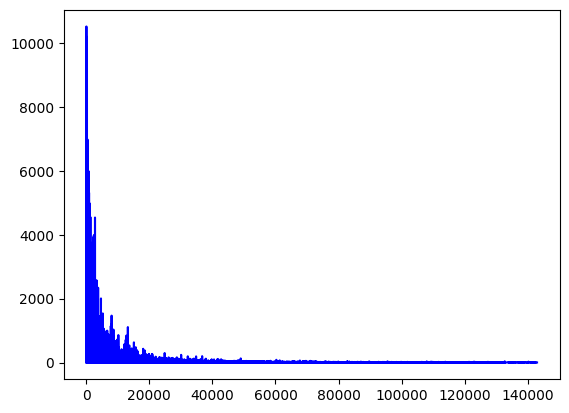

In [34]:
# Veamos la gráfica de palabras nuestro diccionario con base a la frecuencia de las palabras/tokens:

import matplotlib.pyplot as plt

plt.plot(list(np.arange(len(midiccionario))), list(midiccionario.values()), color='blue')
plt.show()

Aparecen palabras que se repiten muchas veces, pero se puede observar que existen palabras que no aportan mucho valor al vocabulario, como la palabra "mas", si". Es necesario continuar limpiando el vocabulario, pero quizás no sea necesario eliminar los acentos ya que forma parte del lenguaje natural y los stopwords contienen acentos en algunos casos también.

In [35]:
# eliminación manual de palabras repetitivas y que pudieran ser consideradas stopwords / que no agregan valor

del midiccionario['mas']
del midiccionario['si']
del midiccionario['tambien']
del midiccionario['dos']
del midiccionario['tres']
del midiccionario['cuatro']
del midiccionario['cinco']
del midiccionario['ser']
del midiccionario['solo']
del midiccionario['según']
del midiccionario['parte']
del midiccionario['cada']
del midiccionario['años']
del midiccionario['puede']
del midiccionario['ahora']
del midiccionario['tras']
del midiccionario['hace']
del midiccionario['sido']
del midiccionario['aunque']
del midiccionario['que']
del midiccionario['que,']
del midiccionario['hacer']
del midiccionario['después']
del midiccionario['así']
del midiccionario['toda']
del midiccionario['me']
del midiccionario['do']


In [36]:
print(midiccionario.most_common(20)) 

[('gobierno', 10197), ('personas', 6986), ('coronavirus', 6274), ('madrid', 5946), ('españa', 5756), ('etiquetas', 5706), ('caso', 5317), ('pp', 4785), ('días', 4555), ('casos', 4540), ('política', 4497), ('día', 4120), ('además', 4097), ('trabajo', 3990), ('año', 3930), ('momento', 3926), ('partido', 3904), ('euros', 3775), ('país', 3766), ('vez', 3681)]


In [37]:
# ajuste de frecuancia de vocabulario

min_freq = 10

midicc = {llave: valor for llave, valor in midiccionario.items() if valor > min_freq}


print('Nueva longitud del nuevo vocabulario:', len(midicc))
print(list(midicc.items())[0:5])     # veamos algunos elementos del diccionario.

Nueva longitud del nuevo vocabulario: 21536
[('españa', 5756), ('dejado', 747), ('católica', 89), ('decía', 395), ('manuel', 884)]


**3. ¿Por qué en este caso no requerimos hacer una partición en entrenamiento, validación y prueba?**

Porque solo se analiza la frecuenia o relevancia de las palabras para encontrar un tópico, pero no existe una etiqueta a predecir como lo es en el aprendizaje supervisado. En este caso se esta buscando entender las palabras más cómunes para así construir los tópicos.

# Parte 1: Indexación semántica latente (LSI):

**4. Encontrar la matriz Tf-idf de la columna de noticias. Despliega los primeros 5 renglones con
algunas de sus columnas con sus nombres, donde las columnas son los tokens.**

In [38]:
# filtrar palabras de acuerdo a definición del vocabulario y generación de strings de noticias


docs_filtered = [] #lista de listas

for noticia in docsclean:
  docs_filtered.append([palabra for palabra in noticia if palabra in midicc])

# generar lisa de comentarios con palabras filtradas (no lista de listas)

ddf = []
for k in range(len(docs_filtered)):
  ddf.append(' '.join(docs_filtered[k]))

# imprimir ejemplo

for k in range(1):
   print(ddf[k])

españa dejado católica decía manuel azaña comienzo segunda república aquel congreso diputados aprobó leyes metáfora dejó católica papel ley creencias buena pueblo migración integración programa vox europa saber españa domingo 10 noviembre dejado excepción europa potencia extrema derecha parlamento metáfora pues precisamente excepcional tener dictadura mediados setenta dictador aún mausoleo 40 existía tal cosa portugal grecia italia alemania países dictaduras fascistas españa pasó portugal italia alemania fascismo franquismo murió cama cortes franquistas ruptura régimen sino reforma nació nuevo país sino país ley ley aun españa parecía 40 franquismo bastantes llegado irrupción actores fundamentales gobiernos autonómicos locales pp ciudadanos españa dejado excepción alianza popular manuel fraga franquismo fuerza nueva blas búnker franquista franquismo mantuviera pp largo tiempos vox escisión propio pp cierto nunca españa democrática existido fuerza extrema derecha 15% votos 52 escaños fe

##Generar matriz Tf-idf a partir de documentos pre-procesados

In [39]:
# Obtenemos nuestro vocabulario de tokens/palabras.

mivocab = list(midicc.keys())     

# importar librería

from sklearn.feature_extraction.text import TfidfVectorizer 

# generar instancia de la clase TfidfVecotrizar

tfidf = TfidfVectorizer(vocabulary=mivocab) # explirar métodos de vectorizer para mejorar transformaciones

# fit transform al objeto previo con los datos analizados de midicc y recibiendo los docuemtnos "ddf" como input

tfidf_sparse = tfidf.fit_transform(ddf) 

# generar features names con el método get_feature_names_out

tfid_features = tfidf.get_feature_names_out()

tfidf_dense = pd.DataFrame( data = tfidf_sparse.toarray(),  columns = tfid_features)  

print(tfidf_dense.iloc[0:6,5:16]) 

      azaña  comienzo   segunda  república     aquel  congreso  diputados  \
0  0.076672  0.045269  0.029751   0.045478  0.036357  0.032018   0.038315   
1  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   0.078399   
2  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000   
3  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000   
4  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000   
5  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   0.000000   

     aprobó     leyes  metáfora      dejó  
0  0.043381  0.045478  0.129702  0.038183  
1  0.000000  0.000000  0.000000  0.000000  
2  0.000000  0.000000  0.000000  0.000000  
3  0.000000  0.000000  0.000000  0.000000  
4  0.000000  0.000000  0.000000  0.000000  
5  0.000000  0.000000  0.000000  0.000000  


In [40]:
# ejemplo del dataframe
tfidf_dense.head()

,españa,dejado,católica,decía,manuel,azaña,comienzo,segunda,república,aquel,...,amsur,trova,heeney,fonsi,aine,gaiás,lactobacillus,zoilamérica,pentecostales,pentecostalismo
0,0.142903,0.099562,0.116255,0.04014,0.069081,0.076672,0.045269,0.029751,0.045478,0.036357,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.010443,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.015639,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.00000,0.017458,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**¿Cuál es el significado de cada renglón? ¿Y el significado de cada columna?**

Cada renglón es una noticia y cada columna es una palabra del vocabulario. El vocabulario es muy extenso ya que este se creó a partir de las 5658 noticias. El valor de obtenido nos dice que tan importante es la palabra para el vocabulario.


**5. Aplica el método de descomposición de valores singulares truncado a la matriz Tf-idf anterior con
10 componentes y obtener el gráfico de la importancia relativa de estas.**

In [41]:
from sklearn.decomposition import TruncatedSVD

# definir la cantidad de componentes (tópicos)

r = 10

# create instancia de la clase TruncatedSVD

svd_obj = TruncatedSVD( n_components = r ,n_iter = 100,random_state = 42)

# fit_transform 

tfidf_lsi = svd_obj.fit_transform(tfidf_sparse)

# sigma and V_transposed 
sigma = svd_obj.singular_values_

V_T = svd_obj.components_.T



In [42]:
sigma

array([13.92085905,  7.89196411,  6.29672736,  6.10170083,  5.79598872,
        5.61558707,  5.24876583,  5.05657628,  4.96281164,  4.76614347])

In [43]:
sigma.shape

(10,)

In [44]:
V_T # columnas son los topics (n_terms X r)

array([[ 9.11746139e-02,  1.11196487e-02, -2.99359925e-02, ...,
         4.44740113e-02, -6.04054385e-02,  8.51423737e-02],
       [ 2.02036363e-02,  1.16804248e-04,  1.21664982e-03, ...,
         3.35402880e-02,  4.46531135e-03, -4.21518608e-03],
       [ 2.61656938e-03, -2.17211653e-03, -4.14693962e-03, ...,
         6.03718486e-05,  8.37818129e-04, -1.42202179e-04],
       ...,
       [ 2.82070186e-04, -2.85729711e-04, -1.27249250e-03, ...,
         1.63727525e-04,  4.01587993e-04, -1.04223787e-03],
       [ 4.44505886e-04, -4.10971324e-04, -9.00172650e-04, ...,
         1.34276314e-04, -7.85270299e-04,  4.13826403e-05],
       [ 1.81094991e-04, -1.67432762e-04, -3.66737005e-04, ...,
         5.47051649e-05, -3.19924937e-04,  1.68595942e-05]])

In [45]:
V_T.shape # 10 topicos principales
lsi_term_topic = V_T

In [46]:
len(mivocab)

21536

In [70]:
# conseguir nombre de los términos / tokens:

term_names = list(tfidf.get_feature_names_out())
print(term_names[0:5])



['españa', 'dejado', 'católica', 'decía', 'manuel']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**6. Obtener la matriz tokens-temas (term-topic) a partir de la matriz 𝑉􀯍 de la descomposición SVD.
Despliega sus primeros 5 renglones donde se incluya el nombre de las columnas.**

In [48]:
# lsi_term_topic tienes los 10 topics resultantes de la descomposición de valores

term_topic_matrix = pd.DataFrame( data = lsi_term_topic
                                 ,index = term_names
                                 ,columns = [f'Concepto_Latente_{r}' for r in range(0,V_T.shape[1])]
                                )

print(term_topic_matrix.shape) #



(21536, 10)


In [49]:
# esta es la matriz resultante, donde las filas son las palabras y las columnas son los "conceptos latentes"
term_topic_matrix


,Concepto_Latente_0,Concepto_Latente_1,Concepto_Latente_2,Concepto_Latente_3,Concepto_Latente_4,Concepto_Latente_5,Concepto_Latente_6,Concepto_Latente_7,Concepto_Latente_8,Concepto_Latente_9
españa,0.091175,0.011120,-0.029936,-0.044750,-0.020232,0.025430,0.037290,0.044474,-0.060405,0.085142
dejado,0.020204,0.000117,0.001217,-0.009114,-0.011550,0.000391,0.010009,0.033540,0.004465,-0.004215
católica,0.002617,-0.002172,-0.004147,0.000041,0.001483,0.002993,-0.001681,0.000060,0.000838,-0.000142
decía,0.009986,-0.007106,-0.009716,-0.002889,0.001661,0.005949,-0.011267,0.008228,0.000884,-0.008989
manuel,0.019466,-0.030177,0.010145,-0.015610,0.044415,-0.026076,-0.001482,0.006311,-0.016917,-0.017459
...,...,...,...,...,...,...,...,...,...,...
gaiás,0.000491,-0.000525,-0.000535,0.000058,-0.000522,0.000552,-0.000070,-0.001695,-0.000081,0.000032
lactobacillus,0.000260,0.000221,-0.000711,0.000111,0.000042,0.000228,-0.000541,0.000266,-0.000471,0.000473
zoilamérica,0.000282,-0.000286,-0.001272,0.000232,0.000572,0.000994,-0.001437,0.000164,0.000402,-0.001042
pentecostales,0.000445,-0.000411,-0.000900,0.000057,-0.000029,0.001094,-0.000593,0.000134,-0.000785,0.000041


**7. Con base a la cantidad de conceptos latentes que determinaste en el ejercicio 6 anterior, obtener
cada uno de sus gráficos con sus 10 términos/tokens más importantes. ¿Cómo describirías cada uno de dichos conceptos latentes?**

**8. Para cada uno de los 10 conceptos latentes obtenidos con la descomposición SVD del ejercicio 5,
obtener el gráfico de barras que muestre los 10 términos/tokens más importantes de cada uno de
ellos.**

In [50]:
import seaborn as sns

**Método principal para graficar**

In [51]:
def genera_topwords_matrix(concepto_latente,palabras):
  
  """
  concepto_latente string , es el "nombre" del concepto latente generado en el paso 6, respetando la forma en que fueron redactados previamente en la matriz para así poder graficar
  palabras         int    , número de palabras "top a graficar"

  """

  # ingresar data del concepto latente
  data = term_topic_matrix[concepto_latente]

  # ordenar los valores de forma ascendente para identificar la importancia de la palabra en el concepto latente
  data = data.sort_values(ascending = False)  

  # ingresar el número de palabras top a identificar
  top_words = palabras 
  
  # guardar los top "valores obtenidos de la descomposición de valores"
  top_words_matrix = data[:top_words]

  return top_words_matrix

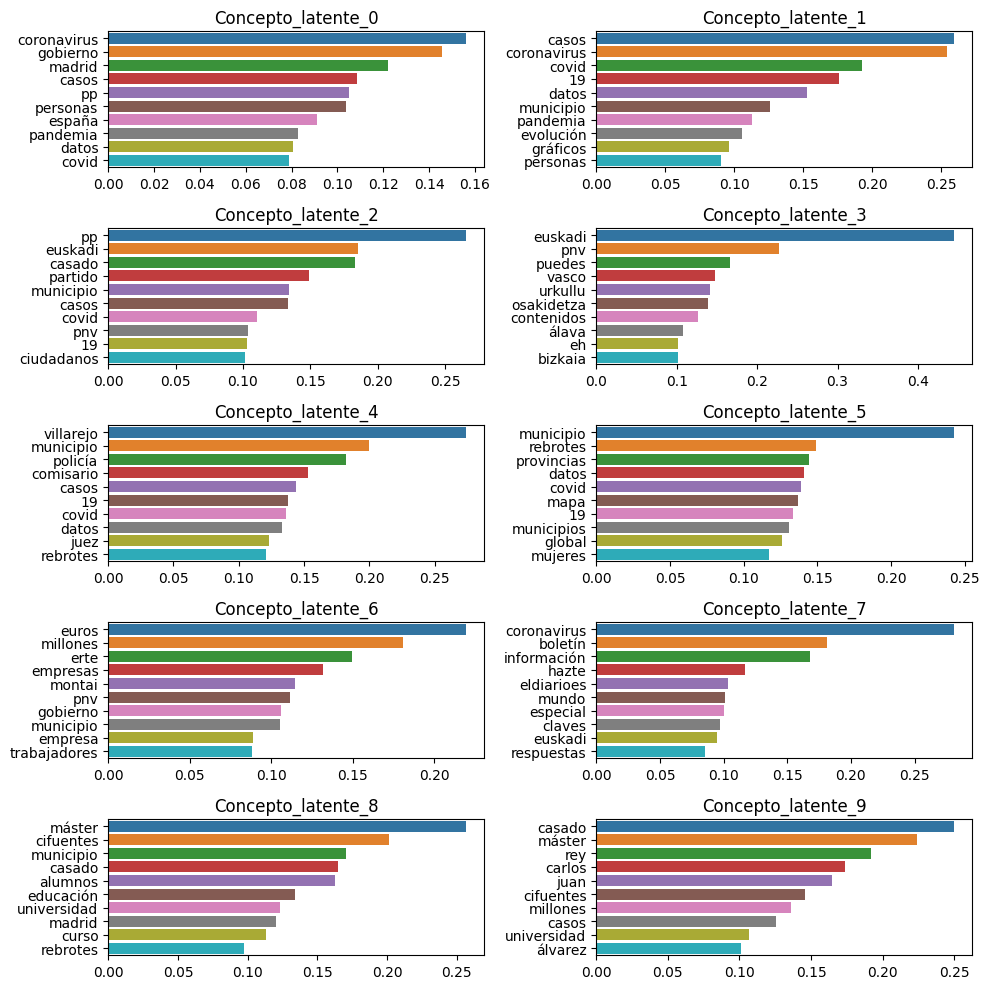

In [52]:
# generar lista de conceptos latentes

conceptos = [f'Concepto_Latente_{r}' for r in range(0,V_T.shape[1])]

# generar espacio para graficar

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(5, 2)
axes = axes.flatten()

# definir la cantidad de topicos por concepto latente a analizar

palabras = 10

# agrgar títulos

for i in range(len(conceptos)):
  axes[i].set_title('Concepto_latente_'+str(i))

# generar gráficos

for concepto in conceptos:
  sns.barplot( x = genera_topwords_matrix(concepto,palabras).values, y = genera_topwords_matrix(concepto,palabras).index, ax = axes[conceptos.index(concepto)])




**Método adicional para graficar**

In [53]:
def grafica_concepto(concepto_latente,palabras):
  
  """
  concepto_latente string , respetando la forma en que fueron redactados previamente en la matrizx
  palabras         int    , número de palabras "top a graficar"

  """

  # ingresar data del concepto latente
  data = term_topic_matrix[concepto_latente]

  # ordenar los valores de forma ascendente para identificar la importancia de la palabra en el concepto latente
  data = data.sort_values(ascending = False)  

  # ingresar el número de palabras top a identificar
  top_words = palabras 
  
  # guardar los top "valores obtenidos de la descomposición de valores"
  top_words_matrix = data[:top_words]

  # plot
  sns.set(rc ={'figure.figsize':(3,2)})
  plt.title('Mejores términos / tokens del '+ concepto_latente)
  fig = sns.barplot( x = top_words_matrix.values, y = top_words_matrix.index)




<Axes: title={'center': 'Concepto_latente_9'}>

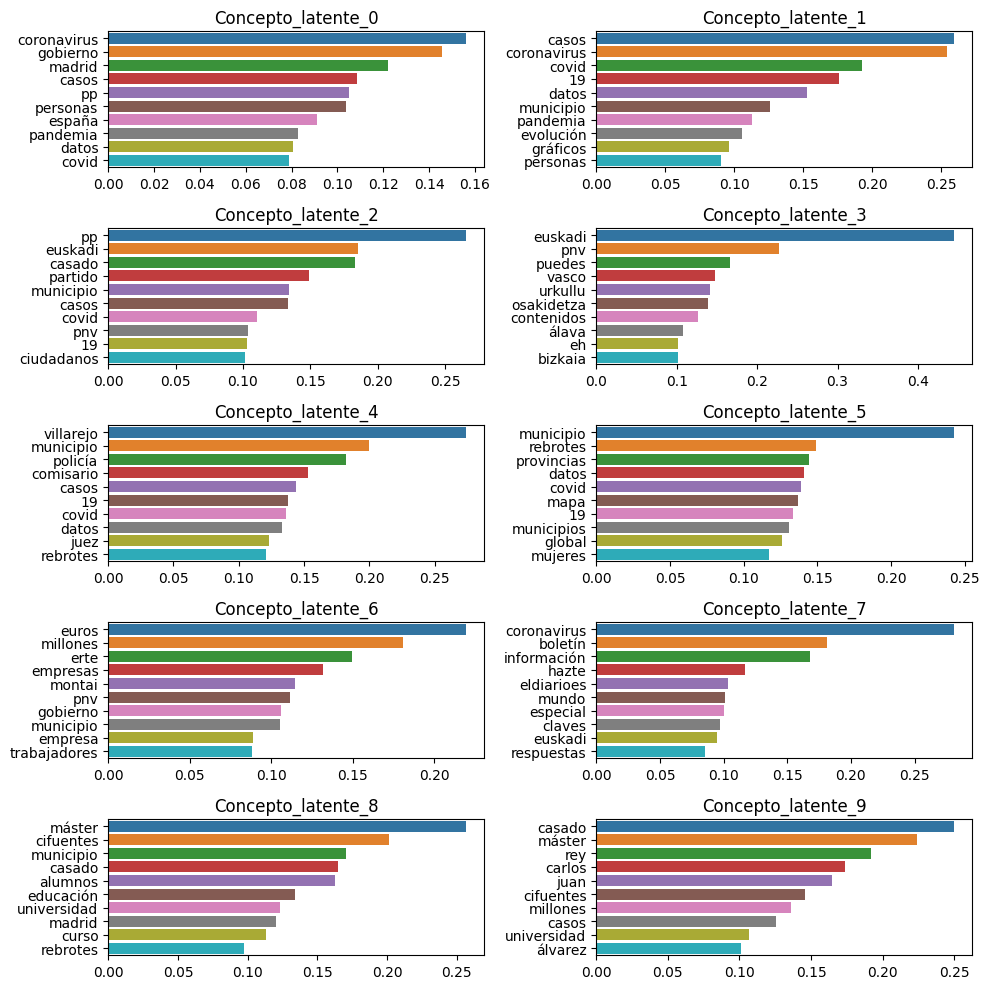

In [54]:
# genera espacio para graficar 

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(5, 2)
axes = axes.flatten()


# definir la cantidad de topicos por concepto latente a analizar

palabras = 10

# agregar titulos

axes[0].set_title('Concepto_latente_0')
axes[1].set_title('Concepto_latente_1')
axes[2].set_title('Concepto_latente_2')
axes[3].set_title('Concepto_latente_3')
axes[4].set_title('Concepto_latente_4')
axes[5].set_title('Concepto_latente_5')
axes[6].set_title('Concepto_latente_6')
axes[7].set_title('Concepto_latente_7')
axes[8].set_title('Concepto_latente_8')
axes[9].set_title('Concepto_latente_9')

# generar gráficos

sns.barplot( x = genera_topwords_matrix('Concepto_Latente_0',palabras).values, y = genera_topwords_matrix('Concepto_Latente_0',palabras).index, ax = axes[0])
sns.barplot( x = genera_topwords_matrix('Concepto_Latente_1',palabras).values, y = genera_topwords_matrix('Concepto_Latente_1',palabras).index, ax = axes[1])
sns.barplot( x = genera_topwords_matrix('Concepto_Latente_2',palabras).values, y = genera_topwords_matrix('Concepto_Latente_2',palabras).index, ax = axes[2])
sns.barplot( x = genera_topwords_matrix('Concepto_Latente_3',palabras).values, y = genera_topwords_matrix('Concepto_Latente_3',palabras).index, ax = axes[3])
sns.barplot( x = genera_topwords_matrix('Concepto_Latente_4',palabras).values, y = genera_topwords_matrix('Concepto_Latente_4',palabras).index, ax = axes[4])
sns.barplot( x = genera_topwords_matrix('Concepto_Latente_5',palabras).values, y = genera_topwords_matrix('Concepto_Latente_5',palabras).index, ax = axes[5])
sns.barplot( x = genera_topwords_matrix('Concepto_Latente_6',palabras).values, y = genera_topwords_matrix('Concepto_Latente_6',palabras).index, ax = axes[6])
sns.barplot( x = genera_topwords_matrix('Concepto_Latente_7',palabras).values, y = genera_topwords_matrix('Concepto_Latente_7',palabras).index, ax = axes[7])
sns.barplot( x = genera_topwords_matrix('Concepto_Latente_8',palabras).values, y = genera_topwords_matrix('Concepto_Latente_8',palabras).index, ax = axes[8])
sns.barplot( x = genera_topwords_matrix('Concepto_Latente_9',palabras).values, y = genera_topwords_matrix('Concepto_Latente_9',palabras).index, ax = axes[9])


**9. Con base a los resultados del ejercicio anterior, ¿cuántos tópicos o conceptos latentes identificas
con claridad? ¿Cómo os describirías, es decir, de qué temáticas estarían hablando?**

- La mayor parte de las palabras gira en torno a tópicos como: pandemia, economía, política, matrimonio y aparecen palabras recurrentes como: casos, covid10, datos, rebrotes, casado, municipios, empresas, rey.

En diferentes tópicos se pudieran identificar los siguientes:
  1. Coronavirus
  2. gobierno
  3. casos 
  4. pp
  5. euskadi
  6. villarejo
  7. municipio
  8. euros
  9. máster
  10. casado

**10. La librería de código abierto Gensim, incluye la implementación de la técnica LSI. Ver
documentación: https://radimrehurek.com/gensim/models/lsimodel.html**

**Investiga la documentación de este modelo LSI en Gensim y aplica dicha técnica a tu conjunto de
datos.**

In [55]:
# importación librerías

from gensim.test.utils import common_dictionary, common_corpus, simple_preprocess
from gensim.models import LsiModel,LdaModel
from gensim.corpora import Dictionary
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel


In [56]:
# creación de diccionario 

# Este diccionario es necesario crearlo para trabajar con los métodos y clases de la librería de gensim

gensim_dictionary = Dictionary(docs_filtered, prune_at=2500000)

# Se genera el corpus de acuerdo al diccionario creado previamente

gensim_corpus = [gensim_dictionary.doc2bow(doc) for doc in docs_filtered]

In [57]:
# Generación del modelo LSI para 2-10 tópicos así como métricas de evaluación de Coherencia

for i in range(2,11):
  
  lsi = LsiModel( gensim_corpus,
                  num_topics = i,
                  id2word = gensim_dictionary,
                  # chunksize = 6,
                  random_seed = 7 
  )

  cm = CoherenceModel( model = lsi,
                       texts = docs_filtered,
                       dictionary = gensim_dictionary,
                       # window_size = 3, 
                       coherence = 'c_v',
                       topn = 3
  )

  cs = cm.get_coherence()


  print('Métrica de Coherencia con {} clusters: {}'.format(i,cs))


Métrica de Coherencia con 2 clusters: 0.6478955658174672
Métrica de Coherencia con 3 clusters: 0.6566918310943303
Métrica de Coherencia con 4 clusters: 0.6848366872750477
Métrica de Coherencia con 5 clusters: 0.6842785722940666
Métrica de Coherencia con 6 clusters: 0.6684061168127192
Métrica de Coherencia con 7 clusters: 0.666796493969388
Métrica de Coherencia con 8 clusters: 0.6521716208178797
Métrica de Coherencia con 9 clusters: 0.6600616705246705
Métrica de Coherencia con 10 clusters: 0.6821863995284175


In [58]:
 # seleccionando el mejor modelo

lsi_selected = LsiModel( gensim_corpus,
                  num_topics = 4,
                  id2word = gensim_dictionary,
                  # chunksize = 6,
                  random_seed = 7 
)

for topic_num, words in   lsi_selected .print_topics(num_words = 4):
  print('Tokens/words in Topic {}:{}'.format(topic_num,words))



Tokens/words in Topic 0:0.250*"gobierno" + 0.174*"personas" + 0.168*"coronavirus" + 0.143*"madrid"
Tokens/words in Topic 1:0.278*"pp" + -0.275*"casos" + -0.249*"coronavirus" + 0.206*"partido"
Tokens/words in Topic 2:0.447*"casos" + 0.211*"madrid" + 0.195*"número" + 0.160*"pp"
Tokens/words in Topic 3:0.315*"gobierno" + -0.221*"casos" + 0.194*"pp" + 0.192*"madrid"


 **En particular, obtener los modelos de 2 a 10 temas/tópicos y para cada uno de ellos obtener
su valor (score) de coherencia. Con base a dichos valores, ¿qué cantidad de tópicos sería el
adecuado? ¿Coincide con lo que obtuviste previamente, usando la técnica SVD de manera directa?¿qué cantidad de tópicos sería el adecuado? ¿Coincide con lo que obtuviste previamente, usando la técnica SVD de manera directa?**

Sí, son muy similares los tópicos de los que se está hablando, no son iguales pero se puede observar que son muy similares

# Parte 2: Asignación de Dirichlet Latente (LDA):

**11. Utiliza la librería Gensim para implementar ahora la técnica de LDA. Revisa la documentación
correspondiente y aplica de preferencia el modelo paralelizable:**

1. https://radimrehurek.com/gensim/models/ldamodel.html
2. https://radimrehurek.com/gensim/models/ldamulticore.html



In [59]:
# NOTAS / COMENTARIOS:
# se genera por "factorización" probabilística
# LDA es más exacto por la base probabilítica, pero ambos modelos se complementan
# no hay una solución tajante, son no supervisados y por lo tanto no son exactos
# se puede generar en "cascada" para después encontrar otros niveles de información "local, regional, etc"

In [60]:
# el corpus ya está generado en gensim_corpus

gensim_corpus = [gensim_dictionary.doc2bow(doc) for doc in docs_filtered]

# epexsar cada documento con palabas para un mejor entendimiento

# [[(gensim_dictionary[id], freq) for id, freq in cor] for cor in gensim_corpus] # se lee al reves el for

In [61]:
# generación del modelo LDI

from gensim.models.ldamulticore import LdaMulticore

# generar modelo : Lda y LdaMulticore son intercambiable
lda_model = LdaMulticore(
                      corpus = gensim_corpus,
                      id2word = gensim_dictionary,
                      num_topics = 4,
                      #chunck size = 6,
                      passes = 10, #numero de pasadas al corpus durante el entrenamiento
                      alpha = 0.2, #alfa: similaridad de documentos - tópicos
                      eta = 0.2, # similaridad de topic - words
                    )

In [62]:
lda_model.print_topics(num_topics = 4, num_words = 4) #tópoicos y palabras con sus probabilidadas mostradas dentro del tópico

[(0, '0.005*"euskadi" + 0.005*"gobierno" + 0.004*"millones" + 0.004*"euros"'),
 (1, '0.007*"pp" + 0.006*"gobierno" + 0.006*"partido" + 0.005*"política"'),
 (2,
  '0.008*"coronavirus" + 0.007*"gobierno" + 0.006*"personas" + 0.006*"madrid"'),
 (3, '0.004*"mujeres" + 0.003*"personas" + 0.003*"mundo" + 0.003*"vida"')]

**12. Con base a esta técnica ¿qué cantidad de tópicos consideras que es la más adecuada? Compara tus
resultados con el método LSI. ¿Qué encuentras de coincidencias y diferencias? ¿Cuál consideras
puede ser el mejor resultado, es decir, cuál consideras puede ser la mejor cantidad de tópicos a
considerar?**

**Tópicos obtenidos mediante LSI**

1. 0.250*"gobierno" + 0.174*"personas" + 0.168*"coronavirus" + 0.143*"madrid"
2. 0.278*"pp" + -0.275*"casos" + -0.249*"coronavirus" + 0.206*"partido"
3. 0.447*"casos" + 0.211*"madrid" + 0.195*"número" + 0.160*"pp"
4. 0.315*"gobierno" + -0.221*"casos" + 0.194*"pp" + 0.192*"madrid"

**Tópicos obtenidos mediante LDI**

1. '0.008*"coronavirus" + 0.006*"personas" + 0.005*"casos" + 0.004*"datos"
2. '0.006*"caso" + 0.005*"euros" + 0.004*"policía" + 0.004*"tribunal"
3. '0.003*"mujeres" + 0.003*"vida" + 0.003*"personas" + 0.002*"vez"'
4. '0.011*"gobierno" + 0.007*"pp" + 0.006*"partido" + 0.005*"política"'

**Son similares en la generalidad de los tópicos de los que se habla, sin embargo tienen algunas diferencias. Las palabas empleadas para definir el tópico son diferentes.** 

**En este caso y para que los métodos sean comparables se están analizando solamente 4 tópicos (conceptos latentes), se comparan sólo con 4 conceptos latentes ya que el mejor modelo de LDI obtuvo su mejor coherencia con 4 conceptos latentes.**


 **Ambos métodos son buenos y son complementarios como se revisó en clase. LSI ayuda a identificar los keywords y a obtener un panorama general de los tópicos, pero al ser muy general se pierde la asociación de palabras cuando hay alguna granularidad de por medio, esto es que los tópicos pueden veriar a niverl nacional o internacional por ejemplo.**

**LDI analiza las palabras de forma probabilística,y la granularidad puede ser analizada con mayor facilidad, ya que identifica la asociación de determinadas palabras con el tópico.**

**13. La librería pyLDAvis nos ayuda a visualizar de manera interactiva los temas y tokens de los
documentos analizados. Revisa la documentación y utilízala para visualizar tus mejor resultado.
https://pypi.org/project/pyLDAvis/**

In [66]:
# !pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
# import pyLDAvis
# import pyLDAvis.gensim

# pyLDAvis.enable_notebook()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:

# p = pyLDAvis.gensim.prepare(lda_model, gensim_corpus, gensim_dictionary)
# p

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
